In [69]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot
import seaborn as sns

Import curated win,lose pairs. Right now, I am just using the games from October (with the October titled arena). In the future, I'll expand it to all games. Will need to do this back at my desktop. :)

In [2]:
match_results = pd.read_pickle("./2018-10-ALL.pkl")

Create a graph that we can search

In [17]:
net = nx.from_pandas_edgelist(match_results,'W','L',create_using=nx.DiGraph())

In [18]:
net.is_directed()

True

Get inputs from the user. A few ones you might want to check are suggested.

In [139]:
your_user_name = 'mathemagically'
target_user_name = 'Chess-Network' #DrDrunkenstein, penguingim1, german11, thibault

Make sure you played games in the period.

In [140]:
(match_results==your_user_name).any()

W    True
L    True
dtype: bool

In [141]:
path = nx.shortest_path(net,source=your_user_name,target=target_user_name)

In [142]:
print('You are '+str(len(path)-1)+' degress of seperation away from '+target_user_name)

You are 4 degress of seperation away from Chess-Network


In [143]:
print(path)

['mathemagically', 'nicholashart', 'Samposebe', 'schizo2000', 'Chess-Network']


###  Quick Plot

In [91]:
target_user_name = 'DrDrunkenstein'
magnus_distance = np.zeros(5000)
i = 0
while True:
    random_user = np.random.choice(match_results['W'])
    if nx.has_path(net,random_user,target_user_name) == True:
        path = nx.shortest_path(net,source=random_user,target=target_user_name)
        magnus_distance[i] = len(path)-1
        i += 1
    if i == 5000:
        break

In [92]:
target_user_name = 'thibault'
thibault_distance = np.zeros(5000)
i = 0
while True:
    random_user = np.random.choice(match_results['W'])
    if nx.has_path(net,random_user,target_user_name) == True:
        path = nx.shortest_path(net,source=random_user,target=target_user_name)
        thibault_distance[i] = len(path)-1
        i += 1
    if i == 5000:
        break

In [93]:
target_user_name = 'german11'
german11_distance = np.zeros(5000)
i = 0
while True:
    random_user = np.random.choice(match_results['W'])
    if nx.has_path(net,random_user,target_user_name) == True:
        path = nx.shortest_path(net,source=random_user,target=target_user_name)
        german11_distance[i] = len(path)-1
        i += 1
    if i == 5000:
        break

In [94]:
target_user_name = 'penguingim1'
penguingim1_distance = np.zeros(5000)
i = 0
while True:
    random_user = np.random.choice(match_results['W'])
    if nx.has_path(net,random_user,target_user_name) == True:
        path = nx.shortest_path(net,source=random_user,target=target_user_name)
        penguingim1_distance[i] = len(path)-1
        i += 1
    if i == 5000:
        break

In [95]:
print('Mean distance from Magnus Carlsen: '+str(np.mean(magnus_distance)))
print('Mean distance from thibault: '+str(np.mean(thibault_distance)))
print('Mean distance from german11: '+str(np.mean(german11_distance)))
print('Mean distance from penguingim1: '+str(np.mean(penguingim1_distance)))

Mean distance from Magnus Carlsen: 4.3232
Mean distance from thibault: 3.0982
Mean distance from german11: 2.4184
Mean distance from penguingim1: 3.4324


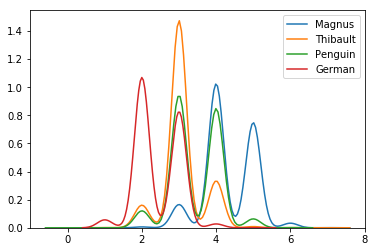

In [104]:
sns.kdeplot(magnus_distance, bw=.2, label="Magnus")
sns.kdeplot(thibault_distance, bw=.2, label="Thibault")
sns.kdeplot(penguingim1_distance, bw=.2, label="Penguin")
sns.kdeplot(german11_distance, bw=.2, label="German")